In [45]:
from webbrowser import get
import torchtt as tntt
import numpy as np
import tt_iga
import matplotlib.pyplot as plt
import torch as tn
import datetime

tn.set_default_dtype(tn.float64)

In [46]:
xparam0 = lambda y: y[...,0]
yparam0 = lambda y: (y[...,1]*2-1)*0.5*(1+y[...,2]*np.sin(np.pi*y[...,0]))



baza1 = tt_iga.bspline.BSplineBasis(np.linspace(0,1,128),2)
baza2 = tt_iga.bspline.BSplineBasis(np.linspace(0,1,126),2)

geom1 = tt_iga.PatchBSpline.interpolate_geometry([xparam0, yparam0], [baza1, baza2], [tt_iga.lagrange.LagrangeLeg(8,[-0.5,0.5])])

geom0 = tt_iga.PatchBSpline.interpolate_geometry([lambda y : y[...,0], lambda y : y[...,1]], [baza1, baza2], [])

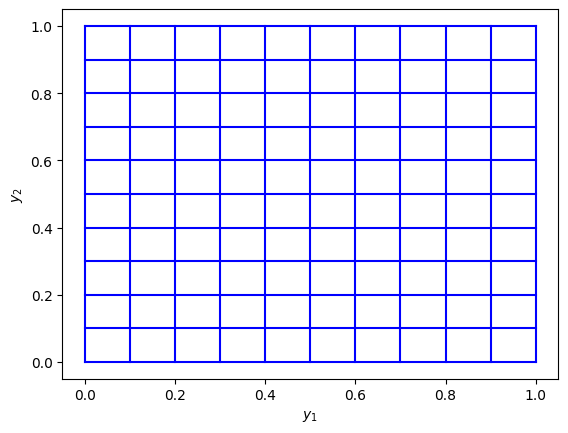

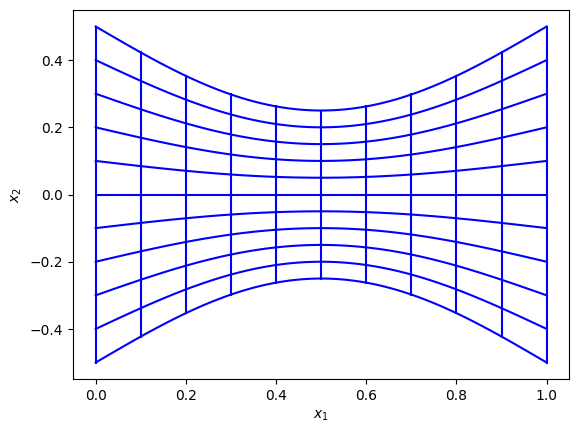

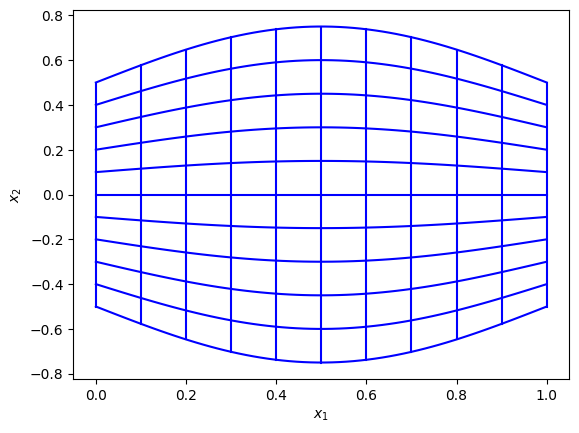

In [47]:
import tikzplotlib
plt.figure()
for t in np.linspace(0,1,11):
    plt.plot(np.linspace(0,1,32),np.ones((32,))*t,'b')
    plt.plot(np.ones((32,))*t,np.linspace(0,1,32),'b')
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')
tikzplotlib.save('reference_square.tex')

plt.figure()
for t in np.linspace(0,1,11):
    xs = geom1([tn.linspace(0,1,64), tn.tensor([t]), tn.tensor([-0.5])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'b')
    xs = geom1([tn.tensor([t]), tn.linspace(0,1,32), tn.tensor([-0.5])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'b')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
tikzplotlib.save('deformed_1.tex')

plt.figure()
for t in np.linspace(0,1,11):
    xs = geom1([tn.linspace(0,1,64), tn.tensor([t]), tn.tensor([1.0/2])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'b')
    xs = geom1([tn.tensor([t]), tn.linspace(0,1,32), tn.tensor([0.5])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'b')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
tikzplotlib.save('deformed_2.tex')



B-Spline basis of degree 2 and dimension 5 at 139623775992896
B-Spline basis of degree 2 and dimension 3 at 139623775993088


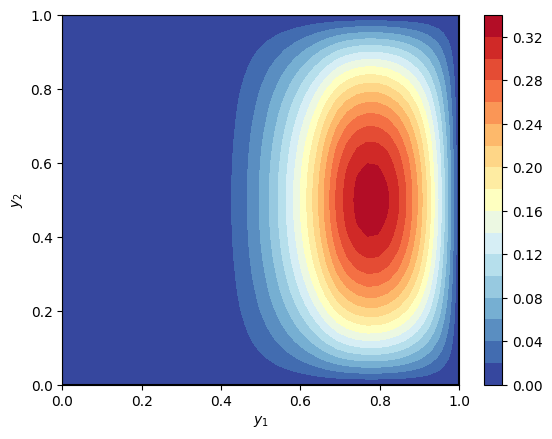

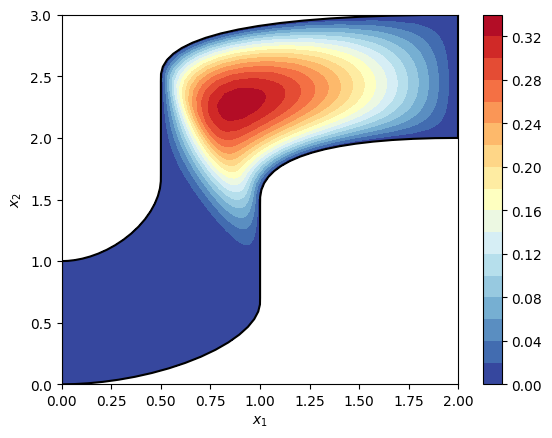

In [48]:
control_points = np.zeros([2,5,3])

control_points[:,0,0] = np.array([0,0])
control_points[:,1,0] = np.array([1,0])
control_points[:,2,0] = np.array([1,1])
control_points[:,3,0] = np.array([1,2])
control_points[:,4,0] = np.array([2,2])

control_points[:,0,2] = np.array([0,1])
control_points[:,1,2] = np.array([0.5,1])
control_points[:,2,2] = np.array([0.5,2])
control_points[:,3,2] = np.array([0.5,3])
control_points[:,4,2] = np.array([2,3])

control_points[:,:,1] = 0.5*(control_points[:,:,0]+control_points[:,:,2])


weights = np.ones([5,3])
weights[1,:] = 1/2

basis1 = tt_iga.bspline.BSplineBasis(np.array([0,1/3,2/3,1]),2)
basis2 = tt_iga.bspline.BSplineBasis(np.array([0,1]),2)
print(basis1)
print(basis2)

geom2 = tt_iga.PatchNURBS([basis1, basis2],[], [tntt.TT(control_points[0,:,:]), tntt.TT(control_points[1,:,:])], tntt.TT(weights))

fspace = tt_iga.Function([basis1, basis2])
dofs = 0*weights
dofs[3,1] = 1.0

fspace.dofs = tntt.TT(dofs)

y1, y2 = tn.linspace(0,1,40), tn.linspace(0,1,43)
fval = fspace([y1, y2]).numpy()

plt.figure()
xs = geom0([y1,y2])
plt.contourf(xs[0].numpy(),xs[1].numpy(),fval,levels=16,cmap='RdYlBu_r')
xs = geom0([tn.linspace(0,1,64), tn.tensor([0])])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
xs = geom0([tn.tensor([0]), tn.linspace(0,1,32)])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
xs = geom0([tn.linspace(0,1,64), tn.tensor([1])])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
xs = geom0([tn.tensor([1]), tn.linspace(0,1,32)])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
plt.colorbar()
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')
tikzplotlib.save('basis_reference.tex')

plt.figure()
xs = geom2([y1,y2])
plt.contourf(xs[0].numpy(),xs[1].numpy(),fval,levels=16,cmap='RdYlBu_r')
xs = geom2([tn.linspace(0,1,50), tn.tensor([0])])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
xs = geom2([tn.tensor([0]), tn.linspace(0,1,32)])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
xs = geom2([tn.linspace(0,1,50), tn.tensor([1])])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
xs = geom2([tn.tensor([1]), tn.linspace(0,1,32)])
plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(),'k')
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
tikzplotlib.save('basis_deformed.tex')


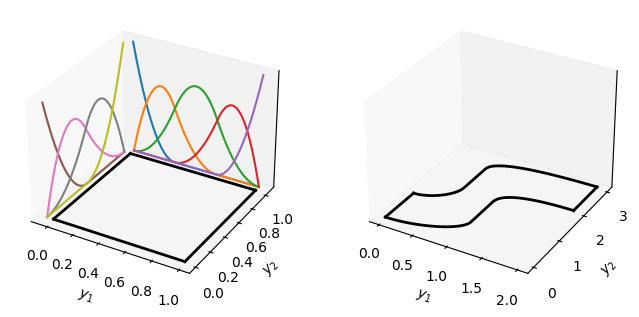

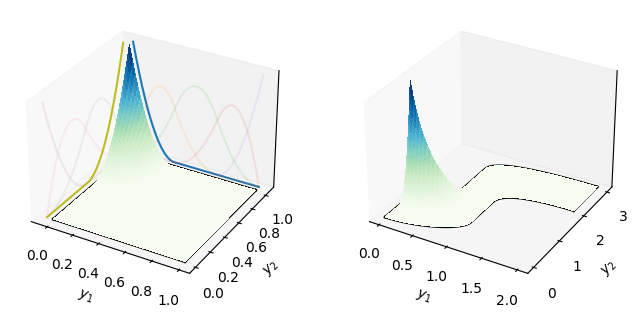

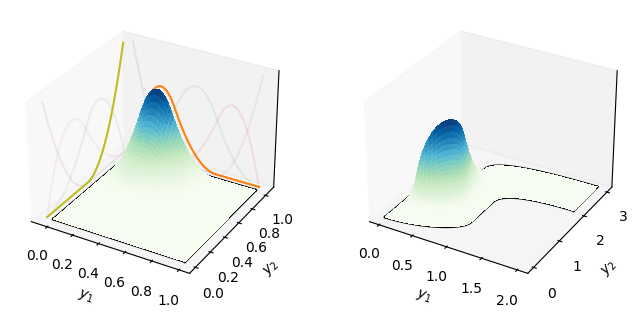

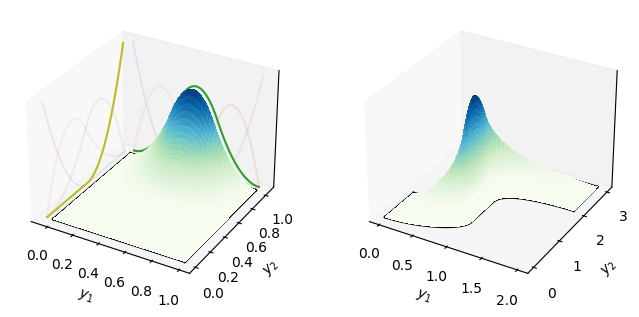

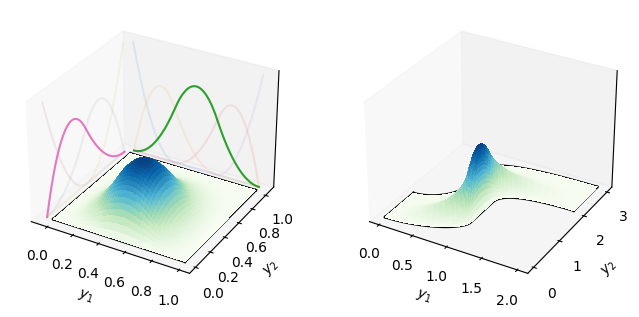

In [131]:
basisx = tt_iga.bspline.BSplineBasis(np.array([0,1/3,2/3,1]),2)
basisy = tt_iga.bspline.BSplineBasis(np.array([0,1/2,1]),2)

def plot(idx = None, fname = None):
    t = np.linspace(0,1,1024)
    fig = plt.figure(figsize = (8,4))
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    xs = geom0([tn.linspace(0,1,64), tn.tensor([0])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    xs = geom0([tn.tensor([0]), tn.linspace(0,1,32)])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    xs = geom0([tn.linspace(0,1,64), tn.tensor([1])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    xs = geom0([tn.tensor([1]), tn.linspace(0,1,32)])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    plt.xlabel(r'$y_1$')
    plt.ylabel(r'$y_2$')
    ax.set_zticks([])
    ax.grid(False)
    
    if idx is None:
        for i in range(basisx.N): ax.plot(t, t*0+1.05, basisx(t)[i,:])
        for i in range(basisy.N): ax.plot(t*0-0.05, t, basisy(t)[i,:])

    else:
        for i in range(basisx.N): ax.plot(t, t*0+1.05, basisx(t)[i,:], alpha = 1 if idx[0]==i else 0.1)
        for i in range(basisy.N): ax.plot(t*0-0.05, t, basisy(t)[i,:], alpha = 1 if idx[1]==i else 0.1)
        ax.plot_surface(np.meshgrid(t,t)[0],np.meshgrid(t,t)[1],np.outer( basisy(t)[idx[1],:], basisx(t)[idx[0],:]), cmap=plt.get_cmap('GnBu'), antialiased=False)

    ax = fig.add_subplot(1, 2, 2, projection='3d')

    xs = geom2([tn.linspace(0,1,64), tn.tensor([0])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    xs = geom2([tn.tensor([0]), tn.linspace(0,1,32)])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    xs = geom2([tn.linspace(0,1,64), tn.tensor([1])])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    xs = geom2([tn.tensor([1]), tn.linspace(0,1,32)])
    plt.plot(xs[0].numpy().flatten(),xs[1].numpy().flatten(), xs[1].numpy().flatten()*0,'k', linewidth = 2)
    if not idx is None:
        XS = geom2([tn.tensor(t),tn.tensor(t)])
        ax.plot_surface(XS[0].numpy().reshape([t.size,t.size]),XS[1].numpy().reshape([t.size,t.size]),np.outer( basisx(t)[idx[0],:], basisy(t)[idx[1],:]), edgecolor ='none', cmap=plt.get_cmap('GnBu'), antialiased=False)
        # ax.contour3D(XS[0].numpy().reshape([t.size,t.size]),XS[1].numpy().reshape([t.size,t.size]),np.outer( basisx(t)[idx[0],:], basisy(t)[idx[1],:]), levels = 32, cmap=plt.get_cmap('GnBu'))
    ax.set_zlim3d([0,1])
    plt.xlabel(r'$y_1$')
    plt.ylabel(r'$y_2$')
    ax.set_zticks([])
    ax.grid(False)
    if not fname is None: plt.savefig(fname)
    
plot(None, 'iga_1.pdf')
plot((0,3), 'iga_2.pdf')
plot((1,3), 'iga_3.pdf')
plot((2,3), 'iga_4.pdf')
plot((2,1), 'iga_5.pdf')
